# EDA of Frames

## Install Dependencies

## Import Dependencies

In [168]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

## Load Data

In [169]:
# load train.csv annotation file
df_train = pd.read_csv('../data/train_sub94.csv')
df_train.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/27610/561476403.parquet,27610,561476403,refrigerator
1,train_landmark_files/62590/1601341273.parquet,62590,1601341273,pizza
2,train_landmark_files/27610/11345226.parquet,27610,11345226,ear
3,train_landmark_files/22343/2474751636.parquet,22343,2474751636,girl
4,train_landmark_files/62590/231359756.parquet,62590,231359756,mad


In [170]:
# load first parquet file in train.csv
i = 1
df_parquet = pd.read_parquet('../data/asl-signs/' + df_train.path[i])

In [171]:
n_frames = df_parquet.frame.nunique()
sign = df_train.sign[i]
n_frames, sign

(12, 'pizza')

In [172]:
df_train.shape[0]

94

In [173]:
""" # list comprehension loop over all rows in train.csv dataframe to get the number of frames
i_max = 1000
n_frames_all_comp = [pd.read_parquet('../data/asl-signs/' + df_train.path[i]).frame.nunique() for i in range(i_max)] """

" # list comprehension loop over all rows in train.csv dataframe to get the number of frames\ni_max = 1000\nn_frames_all_comp = [pd.read_parquet('../data/asl-signs/' + df_train.path[i]).frame.nunique() for i in range(i_max)] "

In [174]:
i_min = 0
i_max = df_train.shape[0]
#i_max = 68368 # parquet file in row 68369 is corrupted
n_frames_all = [] # container for all numbe rof frames

# loop over all rows in train.csv dataframe to get the number of frames
for i in range(i_min, i_max): 
    if i == 0:
        print(i)
    if i%100 == 0: 
        print(i)
    if i == i_max: 
        print(i)
    df_parquet = pd.read_parquet('../data/asl-signs/' + df_train.path[i])
    n_frames = df_parquet.frame.nunique()
    n_frames_all.append(n_frames)

0
0


In [175]:
# cannot concatenate object of type ''; only Series and DataFrame objs are valid
n_frames_all = pd.Series(n_frames_all, name='n_frames') # convert to pd.Series

In [176]:
df_frames = pd.concat([n_frames_all, df_train.sign, df_train.participant_id], axis=1)

Getting all number of frames took about 6-7 minutes. So let's save it into a .csv file

In [177]:
df_frames.to_csv('../data/n_frames.csv', index=False)

### Number of Frames per Sign

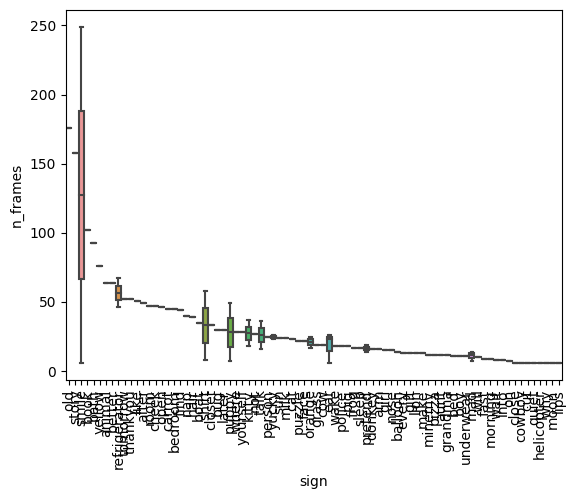

In [178]:
# order by decreasing mean
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index
# boxplot
sns.boxplot(data=df_frames, x="sign", y="n_frames", order=my_order)
plt.xticks(rotation=90)
plt.show()

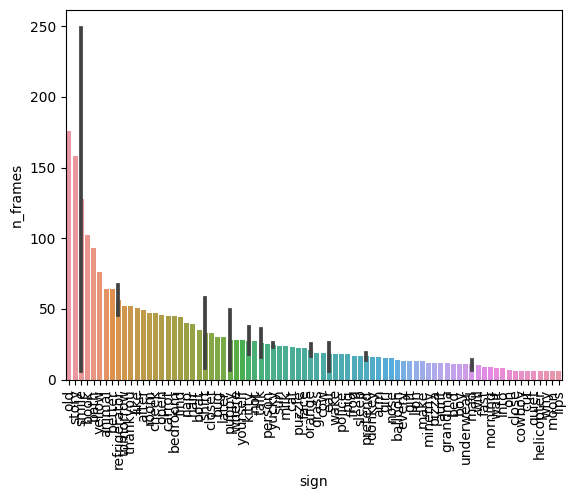

In [179]:
# order by decreasing mean
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index
# barplot
sns.barplot(data=df_frames, x="sign", y="n_frames", order=my_order)
plt.xticks(rotation=90)
plt.show()


### Number of Frames per Participant

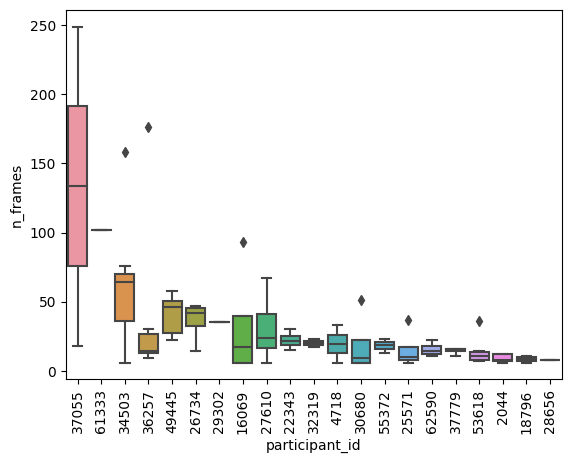

In [180]:
# order by decreasing mean
my_order = df_frames.groupby(by=["participant_id"])["n_frames"].mean().sort_values(ascending=False).index
# boxplot
sns.boxplot(data=df_frames, x="participant_id", y="n_frames", order=my_order)
plt.xticks(rotation=90)
plt.show()

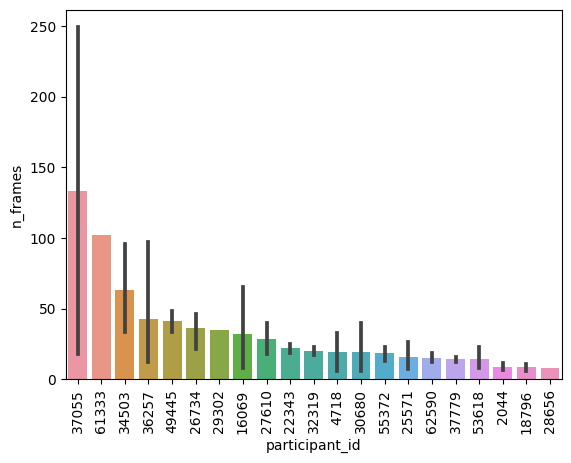

In [181]:
# order by decreasing mean
my_order = df_frames.groupby(by=["participant_id"])["n_frames"].mean().sort_values(ascending=False).index
# barplot
sns.barplot(data=df_frames, x="participant_id", y="n_frames", order=my_order)
plt.xticks(rotation=90)
plt.show()


Some participants (49445) needed up to almost 70 frames per sequence, and others (37779) down to only 10 frames per sequence. 

### Sanity Check: Look at the distribution of signs per participant
To exclude, that the participants with lowest/highest number of frames are enriched in certain words (e.g. short/long signs). 

In [182]:
df_frames = pd.read_csv('../data/n_frames.csv')
df_frames.head()

,n_frames,sign,participant_id
0,67,refrigerator,27610
1,12,pizza,62590
2,23,ear,27610
3,15,girl,22343
4,14,mad,62590


#### Participant with highest number of frames

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 [Text(0, 0, 'old'),
  Text(1, 0, 'story'),
  Text(2, 0, 'smile'),
  Text(3, 0, 'book'),
  Text(4, 0, 'bath'),
  Text(5, 0, 'yellow'),
  Text(6, 0, 'animal'),
  Text(7, 0, 'better'),
  Text(8, 0, 'refrigerator'),
  Text(9, 0, 'tomorrow'),
  Text(10, 0, 'thankyou'),
  Text(11, 0, 'like'),
  Text(12, 0, 'after'),
  Text(13, 0, 'room'),
  Text(14, 0, 'cheek'),
  Text(15, 0, 'open'),
  Text(16, 0, 'carrot'),
  Text(17, 0, 'bedroom'),
  Text(18, 0, 'find'),
  Text(19, 0, 'nap'),
  Text(20, 0, 'hair'),
  Text(21, 0, 'boat'),
  Text(22, 0, 'shirt'),
  Text(23, 0, 'closet'),
  Text(24, 0, 'bug'),
  Text(25, 0, 'later'),
  Text(26, 0, 'pup

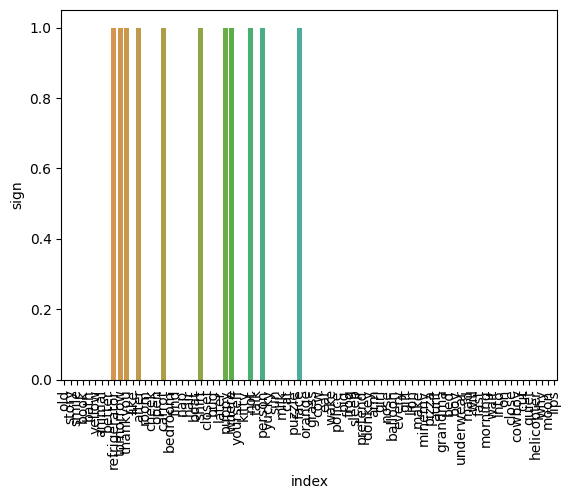

In [183]:
data = df_frames[df_frames.participant_id == 49445].sign.value_counts().reset_index() # participant with highest number of frames
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index # order by increasing mean number of frames

sns.barplot(data=data, x="index", y="sign", order=my_order)
plt.xticks(rotation=90)

#### Participant with lowest number of frames

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 [Text(0, 0, 'old'),
  Text(1, 0, 'story'),
  Text(2, 0, 'smile'),
  Text(3, 0, 'book'),
  Text(4, 0, 'bath'),
  Text(5, 0, 'yellow'),
  Text(6, 0, 'animal'),
  Text(7, 0, 'better'),
  Text(8, 0, 'refrigerator'),
  Text(9, 0, 'tomorrow'),
  Text(10, 0, 'thankyou'),
  Text(11, 0, 'like'),
  Text(12, 0, 'after'),
  Text(13, 0, 'room'),
  Text(14, 0, 'cheek'),
  Text(15, 0, 'open'),
  Text(16, 0, 'carrot'),
  Text(17, 0, 'bedroom'),
  Text(18, 0, 'find'),
  Text(19, 0, 'nap'),
  Text(20, 0, 'hair'),
  Text(21, 0, 'boat'),
  Text(22, 0, 'shirt'),
  Text(23, 0, 'closet'),
  Text(24, 0, 'bug'),
  Text(25, 0, 'later'),
  Text(26, 0, 'pup

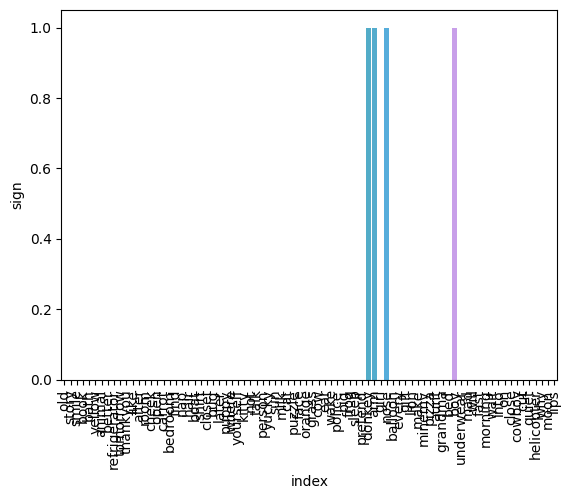

In [184]:
data = df_frames[df_frames.participant_id == 37779].sign.value_counts().reset_index() # participant with lowest number of frames
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index # order by increasing mean number of frames

sns.barplot(data=data, x="index", y="sign", order=my_order)
plt.xticks(rotation=90)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


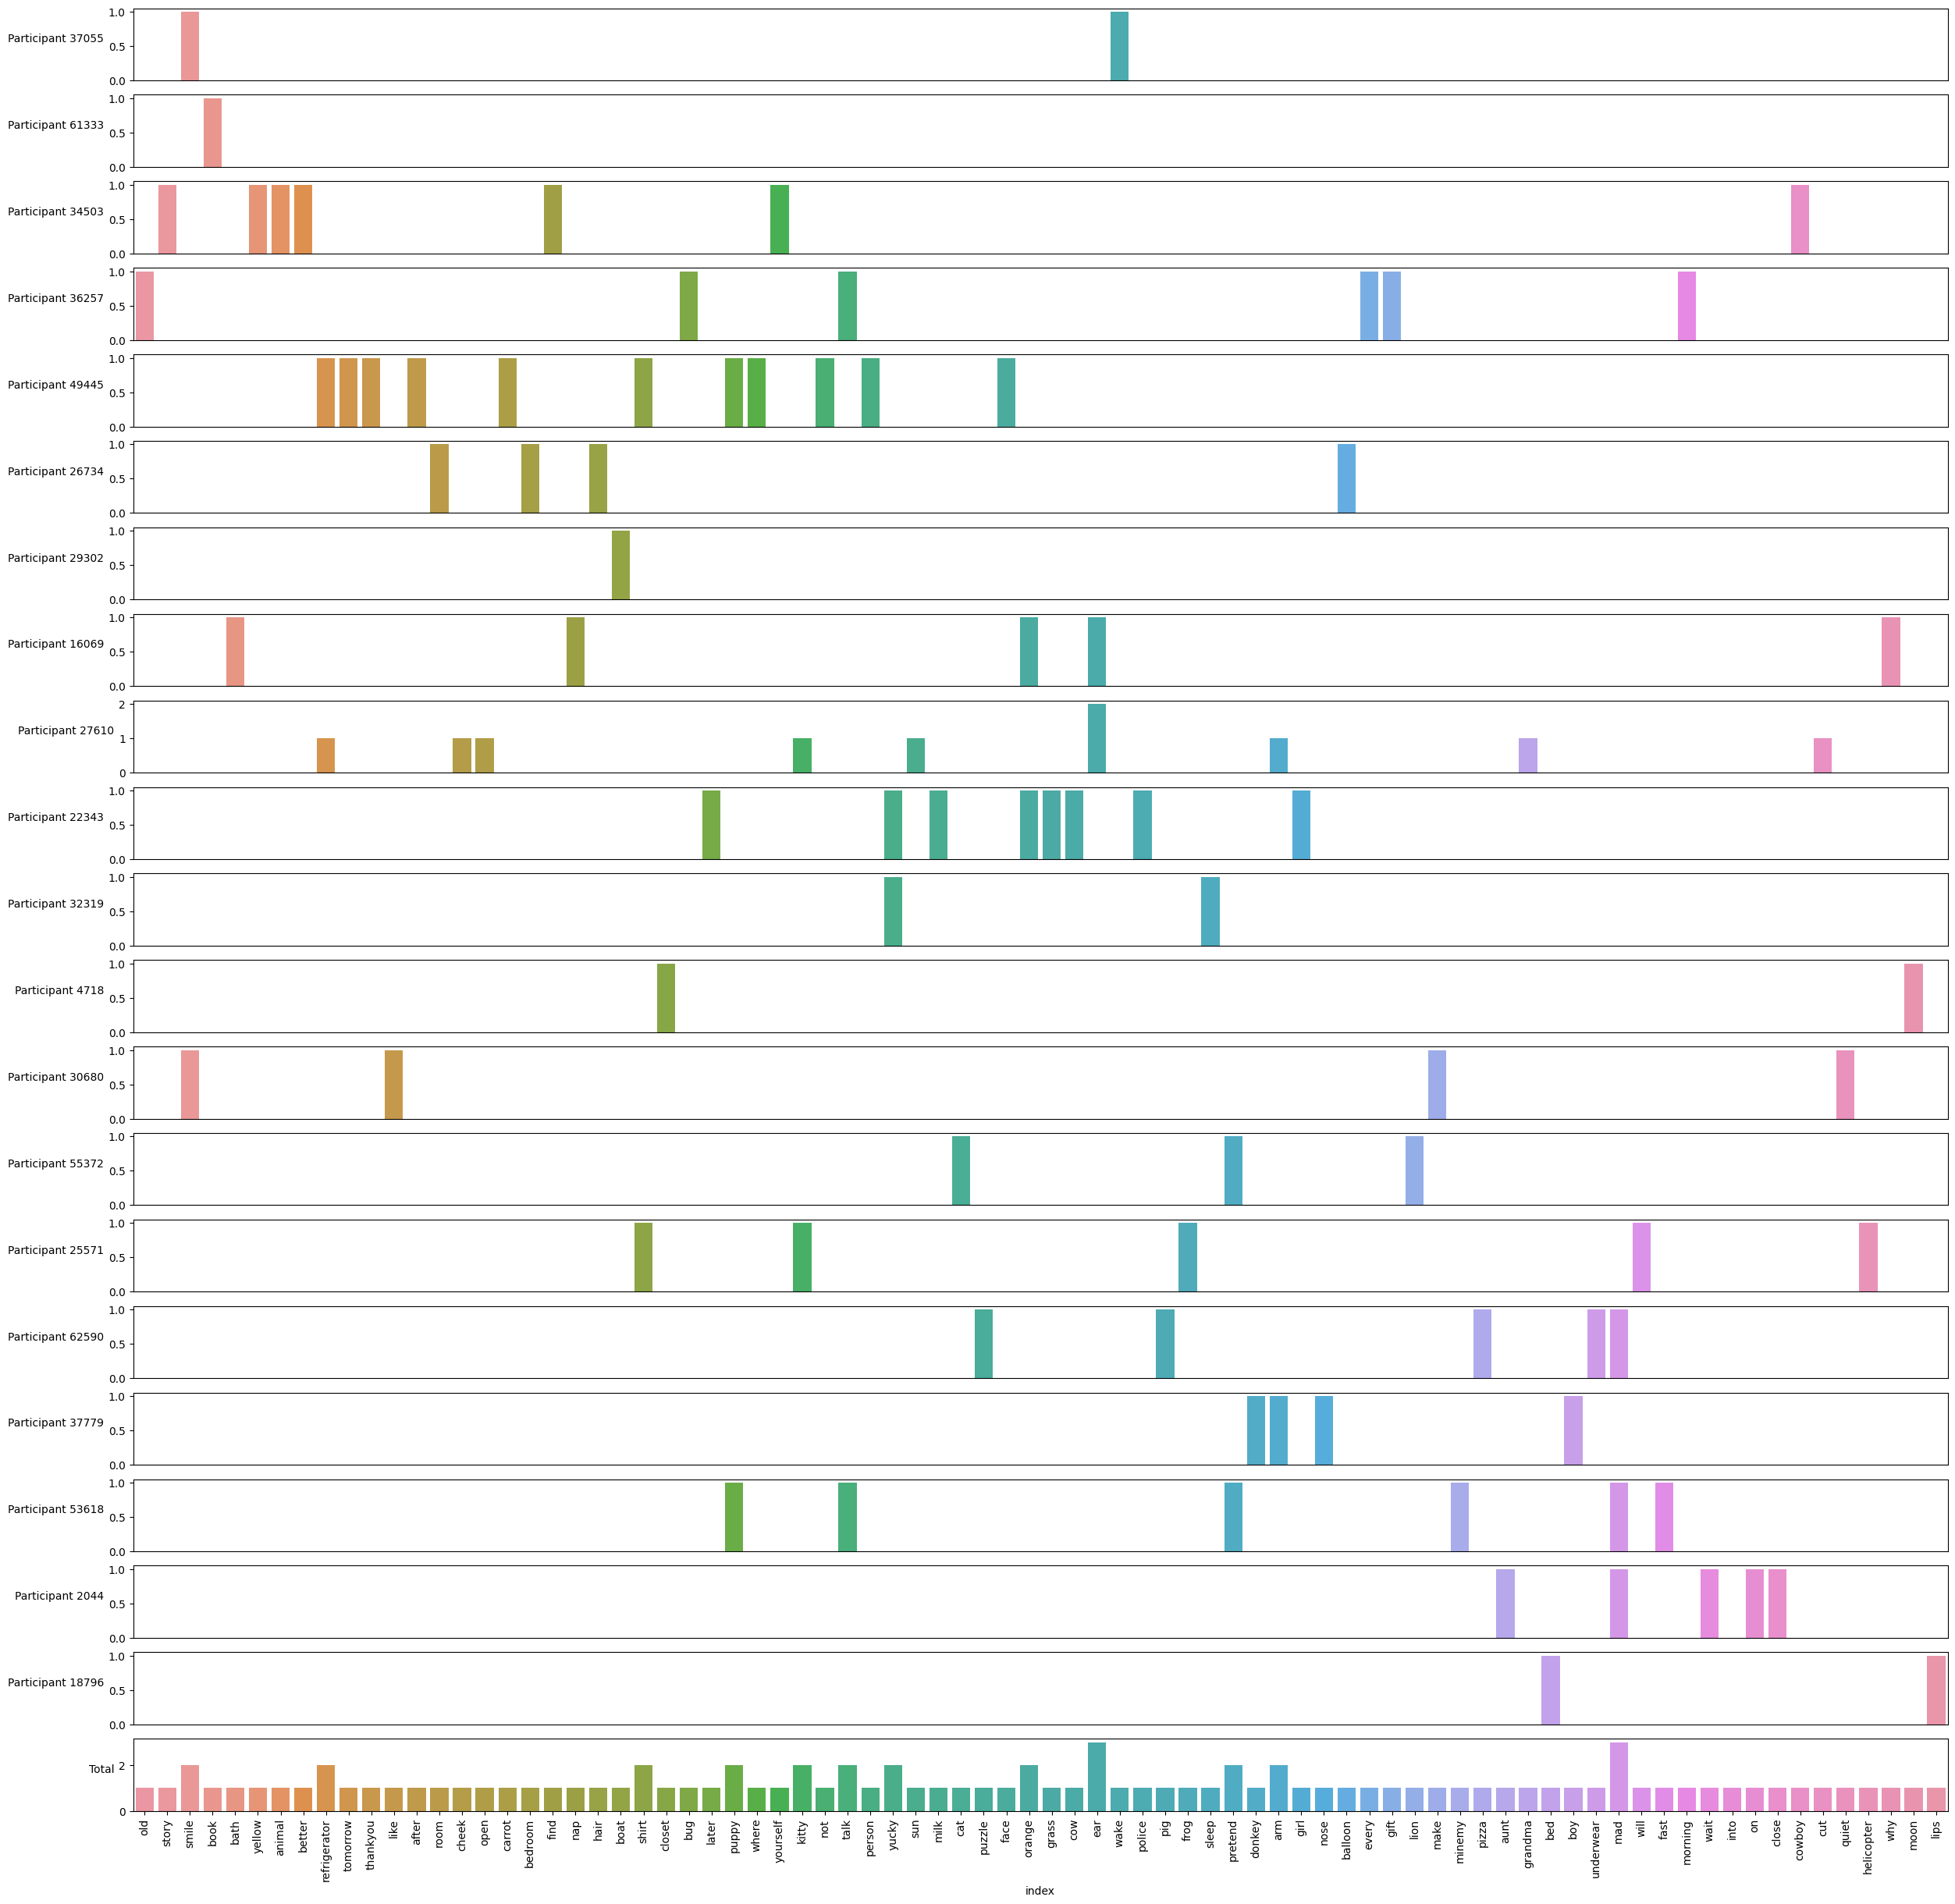

In [185]:
# plotting parameters
participants = df_frames.groupby(by=["participant_id"])["n_frames"].mean().sort_values(ascending=False).index # list of participants sorted by ascending number of frames
ncols = 1 # define plot matrix columns always as 3 
nrows = math.ceil(len(participants+1)/ncols) # define rows depending on the number of participants / categories + one extra row for the total counts
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index # order by increasing mean number of frames

# formatting plotting areas
f, axes = plt.subplots(nrows, ncols, figsize=(30, 30)) # define plot area layout based on pre-defined number of columns and rows
axes = axes.ravel() # flatten axes object to later access it as axes[i] with i indicating the heatmap number

# loop over all available participants to plot each sign distribution
for i in range(len(participants)): 
    print(i)
    participant = participants[i]

    # sign count data for current participant 
    sign_counts = df_frames[df_frames.participant_id == participant].sign.value_counts().reset_index() 

    # plot
    g = sns.barplot(ax=axes[i], data=sign_counts, x="index", y="sign", order=my_order)

    # set y axis labels
    g.set_ylabel(ylabel=f'Participant {participant}', rotation=0, horizontalalignment='right')

    # show xticks labels only for the last row
    if i != len(participants)-1: 
        g.set(xticklabels=[]) 
        g.set(xlabel=None)
        g.tick_params(bottom=False)  # remove the ticks
    else: 
        g.set_xticklabels(g.get_xticklabels(), rotation=90)

# total sign count data
sign_counts = df_frames.sign.value_counts().reset_index() 

# plot total counts
g = sns.barplot(ax=axes[i], data=sign_counts, x="index", y="sign", order=my_order)

# set y axis label for total
g.set_ylabel(ylabel=f'Total', rotation=0, horizontalalignment='right')

# final plotting
plt.show()